# Image Similarity

## Part 1 - Record all feature vectors and export them to a JSON file

In [1]:
%reset -f

from module.utility.ImageFeatureExtractor import ImageFeatureExtractor

CFG = {
    "h5": ".\export model\Res2Net50SE_224x224_feature_vector.h5",
    "target_dir1": "D:\Github Public\DATASET MANAGER\Blue Archive\ILLUSTRATION",
    "target_dir2": "D:\Github Public\DATASET MANAGER\Blue Archive Low Bookmark\ILLUSTRATION",
}

program = ImageFeatureExtractor(CFG["h5"], batch_size=64)
program.export_json([CFG["target_dir1"], CFG["target_dir2"]])

Load model ... COMPLETE
Calculate database feature vector ...
93/93 [====================] - 259s 3s/batch
Export JSON file ... COMPLETE


## Part 2 - Compare the query image with the database to find similar images

### Function Declaration

In [2]:
%reset -f

import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_query(image_path):
    query_image = mpimg.imread(image_path)
    plt.imshow(query_image)
    plt.title(f"Query image")
    plt.axis("off")
    plt.show()

def show_similar(image_list, method, top_score=25):
    grid_size = math.ceil(math.sqrt(top_score))

    if method == "cosine":
        image_list = sorted(image_list, key=lambda x: x[1], reverse=True)[:top_score]
    
    elif method == "distance":
        image_list = sorted(image_list, key=lambda x: x[2])[:top_score]
    
    elif method == "both":
        cosine_list = sorted(image_list, key=lambda x: x[1], reverse=True)[:top_score]
        distance_list = sorted(image_list, key=lambda x: x[2])[:top_score]        
        image_list = [tuple1 for tuple1 in cosine_list for tuple2 in distance_list if tuple1[0] == tuple2[0]]

    plt.figure(figsize=(20,26))
    for idx, data in enumerate(image_list):
        image = mpimg.imread(data[0])
        score = data[1]
        distance = data[2]
        plt.subplot(grid_size, grid_size, idx + 1)
        plt.imshow(image)
        if method == "cosine":
            plt.title(f"Score: {score:.3f}")
        elif method == "distance":
            plt.title(f"Distance: {distance:.3f}")
        elif method == "both":
            plt.title(f"Score: {score:.3f}\nDistance: {distance:.3f}")
        plt.axis("off")
    plt.show()

CFG = {
    "json": "Res2Net50SE_224x224_feature_vector.json",
}

### Get image query

Query image: 1133


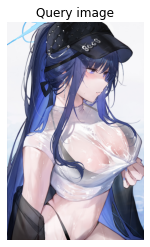

In [3]:
from module.utility.ImageSimilarity import ImageSimilarity

query_id, query_path = ImageSimilarity.random_query_image(CFG["json"])

print(f"Query image: {query_id}")
show_query(query_path)

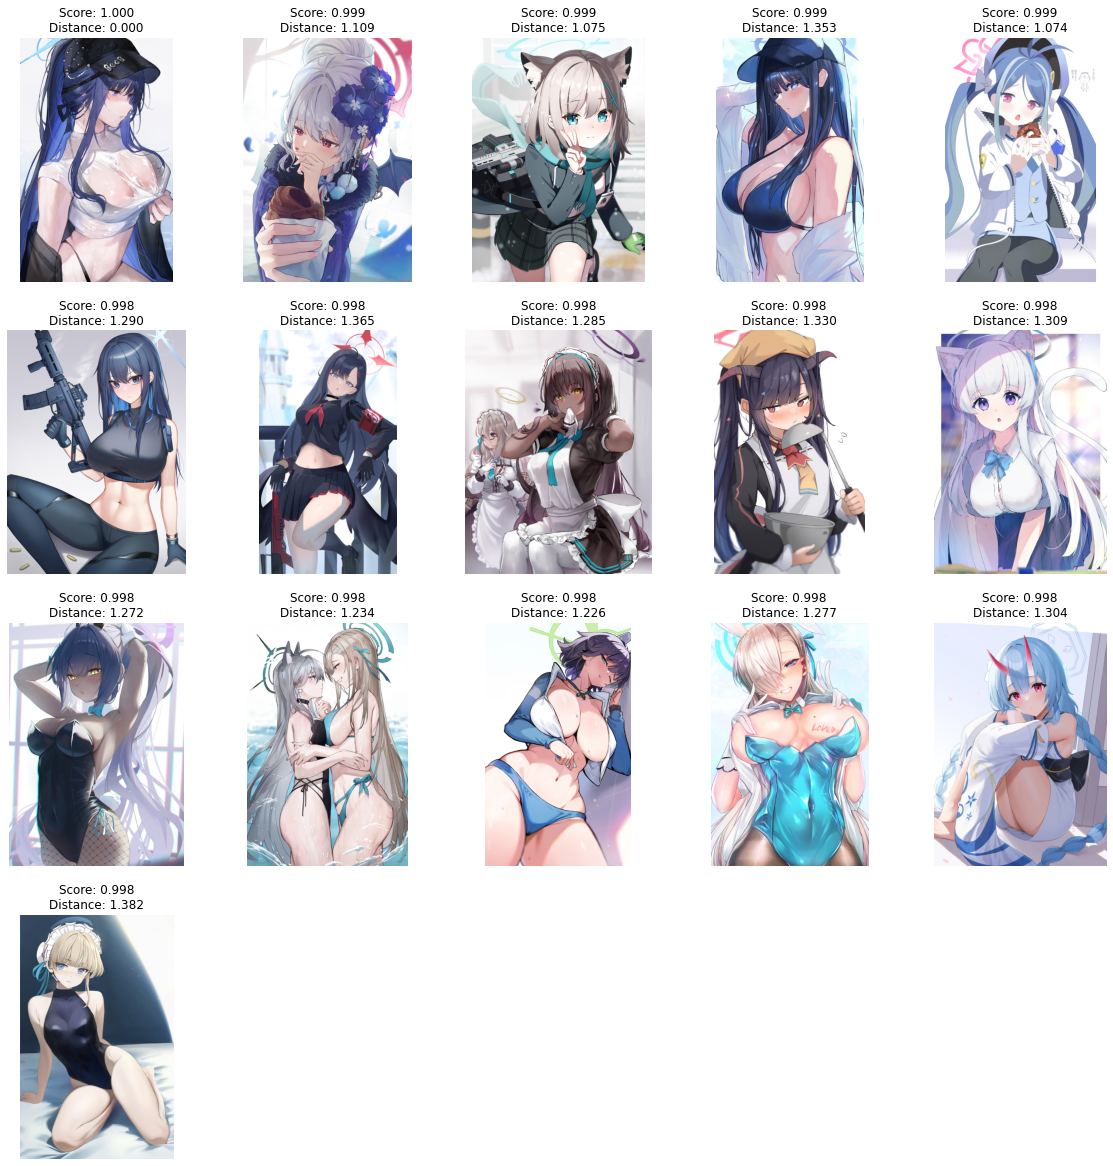

In [4]:
image_list = ImageSimilarity.get_similar_image(CFG["json"], query_id)
show_similar(image_list, method="both", top_score=20)